# Feature - Exploratory Analysis

In [1]:
# import dependencies
from getpass import getpass
import sqlalchemy
from sqlalchemy import Column, Integer, String, ForeignKey, create_engine, text
import psycopg2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/joeymyers/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
# SQL Alchemy connection from RDS
secret = getpass('Enter the secret value: ')

args ={
    'host':"ogdataset.c11hekhsylui.us-west-1.rds.amazonaws.com",
    'port':'5432',
    'database':"og_dataset",
    'user':"attritionProject",
    'password':secret
}
engine = create_engine("postgresql://{user}:{password}@{host}:{port}/{database}".format(**args))
connection = engine.connect()

Enter the secret value: ········


In [3]:
# read in table from database
attrition_df = pd.read_sql('SELECT * FROM cleaned_data', connection)
attrition_df

,Age,Attrition,Business Travel,Department,Distance from Home,Education Level,Education Field,Environment Satisfaction,Gender,Job Involvement,...,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years at Company,Years In Current Role,Years Since Last Promotion,Years With Current Manager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,2,...,3,4,0,17,3,2,9,6,0,8


In [4]:
attrition_df.columns

Index(['Age', 'Attrition', 'Business Travel', 'Department',
       'Distance from Home', 'Education Level', 'Education Field',
       'Environment Satisfaction', 'Gender', 'Job Involvement', 'Job Level',
       'Job Role', 'Job Satisfaction', 'Marital Status', 'Monthly Income',
       'Number Companies Worked', 'Overtime', 'Percent Salary Hike',
       'Performance Rating', 'Relationship Satisfaction', 'Stock Option Level',
       'Total Working Years', 'Training Times Last Year', 'Work Life Balance',
       'Years at Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Current Manager'],
      dtype='object')

In [ ]:
# columns I found to be the most correlated to Attrition along with some interesting ones
columns = ['Age', 'Education Level','Job Level',
       'Job Role', 'Job Satisfaction','Monthly Income',
       'Number Companies Worked', 'Overtime', 'Percent Salary Hike',
       'Stock Option Level','Total Working Years', 'Years at Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Current Manager']

In [ ]:
# for col in columns:
#     # visualize the distribution plot
#     col_plot = sns.displot(x = "Age", hue = "Attrition",element = "poly", data = attrition_df, kde = True)
#     age_plot.savefig("images/ageVSattrition.png")

# Plot features vs Attrition to see trends

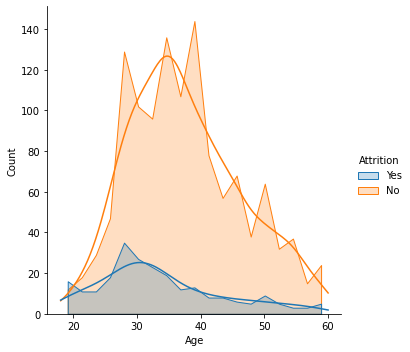

In [22]:
# Age vs Attrition
age_plot = sns.displot(x = "Age", hue = "Attrition",element = "poly", data = attrition_df, kde = True)
age_plot.savefig("images/ageVSattrition.png")

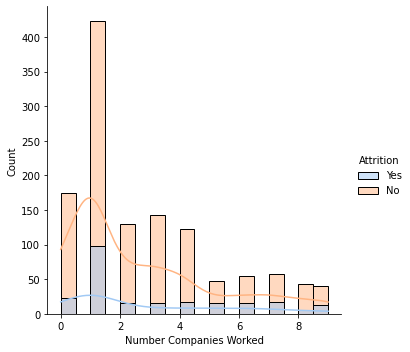

In [23]:
# Num of companies worked at vs Attrition
company_plot = sns.displot(x = "Number Companies Worked", hue = "Attrition", data = attrition_df,kde = True,palette = 'pastel')
company_plot.savefig("images/companies_workedVSattrition.png")

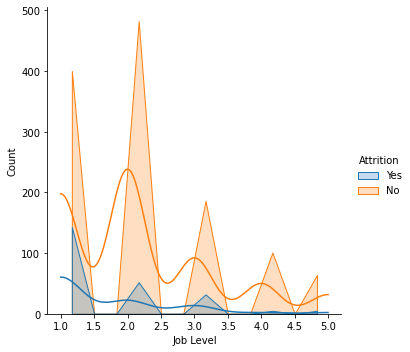

In [7]:
# Job level vs Attrition
jobLevel_plot = sns.displot(x = "Job Level", hue = "Attrition",element = "poly", data = attrition_df, kde = True)
jobLevel_plot.savefig("images/job_levelVSattrition.png")

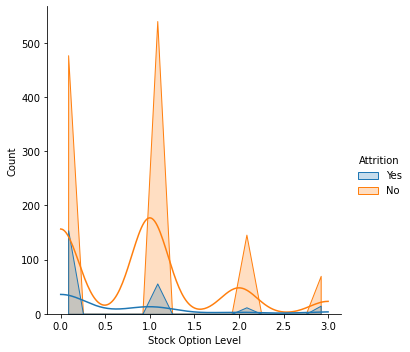

In [8]:
# Stock option level vs Attrition
stockLevel_plot = sns.displot(x = "Stock Option Level", hue = "Attrition",element = "poly", data = attrition_df, kde = True)
stockLevel_plot.savefig("images/stockOptVSattrition.png")

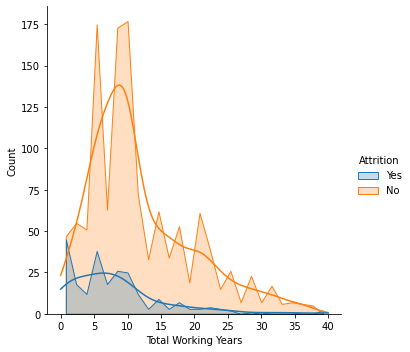

In [10]:
# Tot. Working Years vs Attrition
workingYrs_plot = sns.displot(x = "Total Working Years", hue = "Attrition",element = "poly", data = attrition_df, kde = True)
workingYrs_plot.savefig("images/workingYrsVSattrition.png")

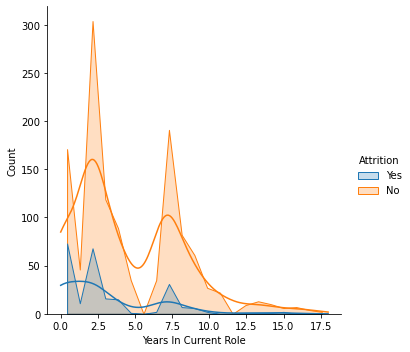

In [11]:
# Yrs in current role vs Attrition
roleYrs_plot = sns.displot(x = "Years In Current Role", hue = "Attrition",element = "poly", data = attrition_df, kde = True)
roleYrs_plot.savefig("images/roleYrsVSattrition.png")

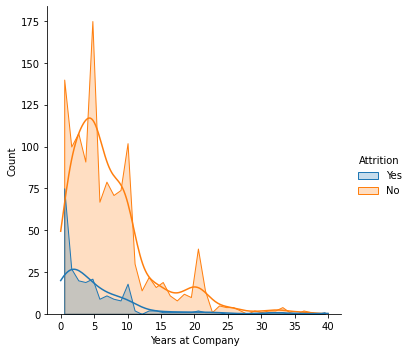

In [12]:
# Years at Company vs Attrition
companyYrs_plot = sns.displot(x = "Years at Company", hue = "Attrition",element = "poly", data = attrition_df, kde = True)
companyYrs_plot.savefig("images/companyYrsVSattrition.png")

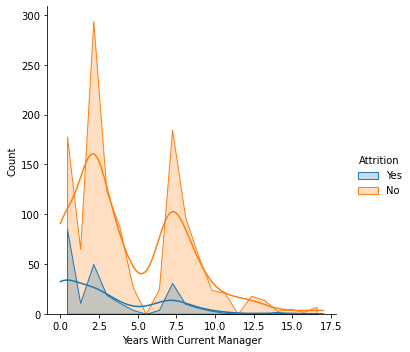

In [13]:
# Years With Current Manager vs Attrition
managerYrs_plot = sns.displot(x = "Years With Current Manager", hue = "Attrition",element = "poly", data = attrition_df, kde = True)
managerYrs_plot.savefig("images/managerYrsVSattrition.png")

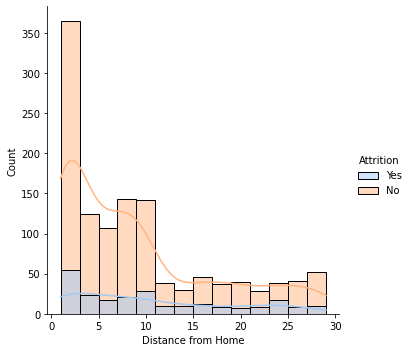

In [15]:
# Distance From Home vs Attrition
sns.displot(x = "Distance from Home", hue = "Attrition", data = attrition_df,kde = True,palette = 'pastel')

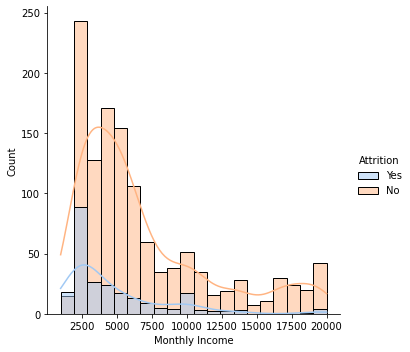

In [24]:
# Monthly Income vs Attrition
income_plot = sns.displot(x = "Monthly Income", hue = "Attrition", data = attrition_df,kde = True,palette = 'pastel')
income_plot.savefig("images/monthly_incomeVSattrition.png")

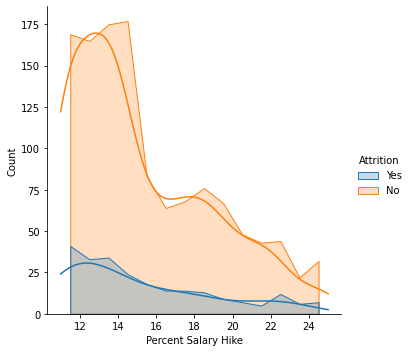

In [25]:
# Percent Salary Hike vs Attrition
salary_hike_plot = sns.displot(x = "Percent Salary Hike", hue = "Attrition",element = "poly", data = attrition_df, kde = True)
salary_hike_plot.savefig("images/salary_hikeVSattrition.png")

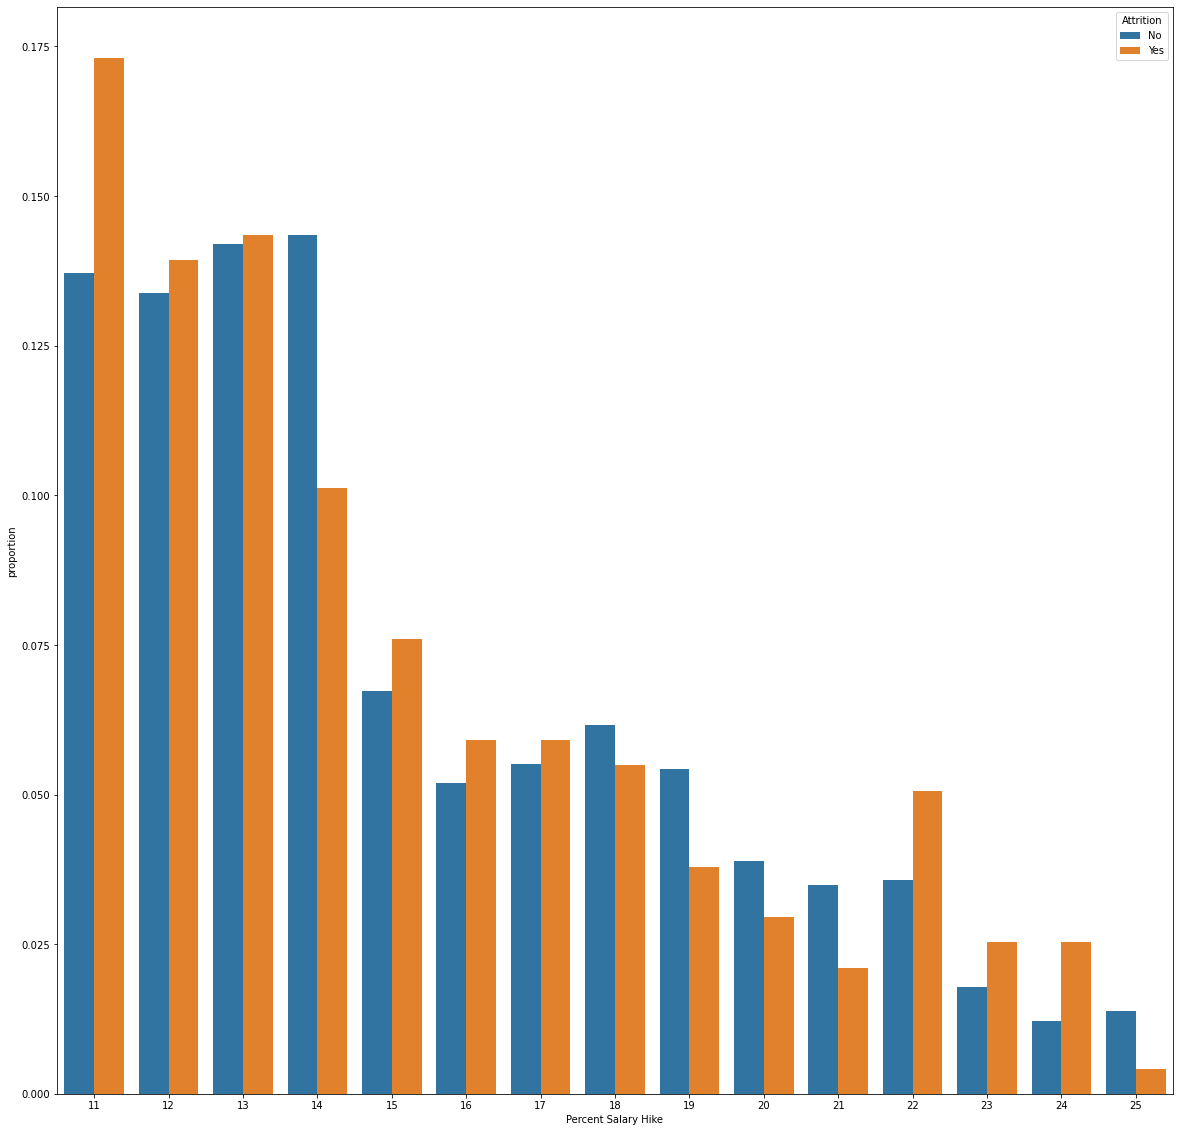

In [16]:
x, y, hue = "Percent Salary Hike", "proportion", "Attrition"
hue_order = [0, 1]
plt.figure(figsize=(20,20))

(attrition_df[x]
 .groupby(attrition_df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

plt.savefig('images/Salaryhike_barplot.png')

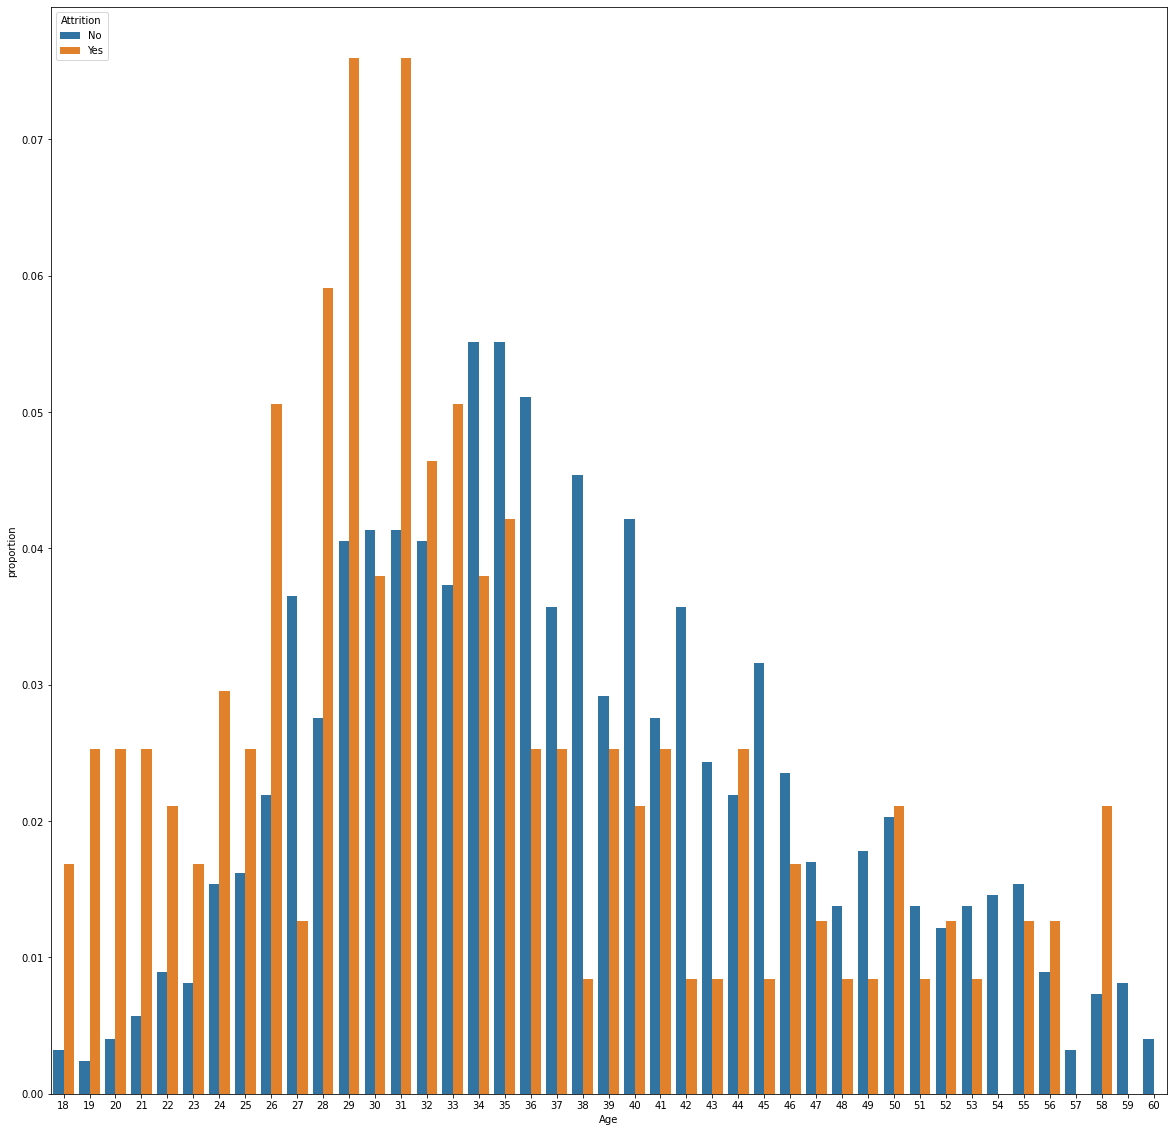

In [14]:
# AGE 
x, y, hue = "Age", "proportion", "Attrition"
hue_order = [0, 1]
plt.figure(figsize=(20,20))

(attrition_df[x]
 .groupby(attrition_df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

plt.savefig('images/age_barplot.png')

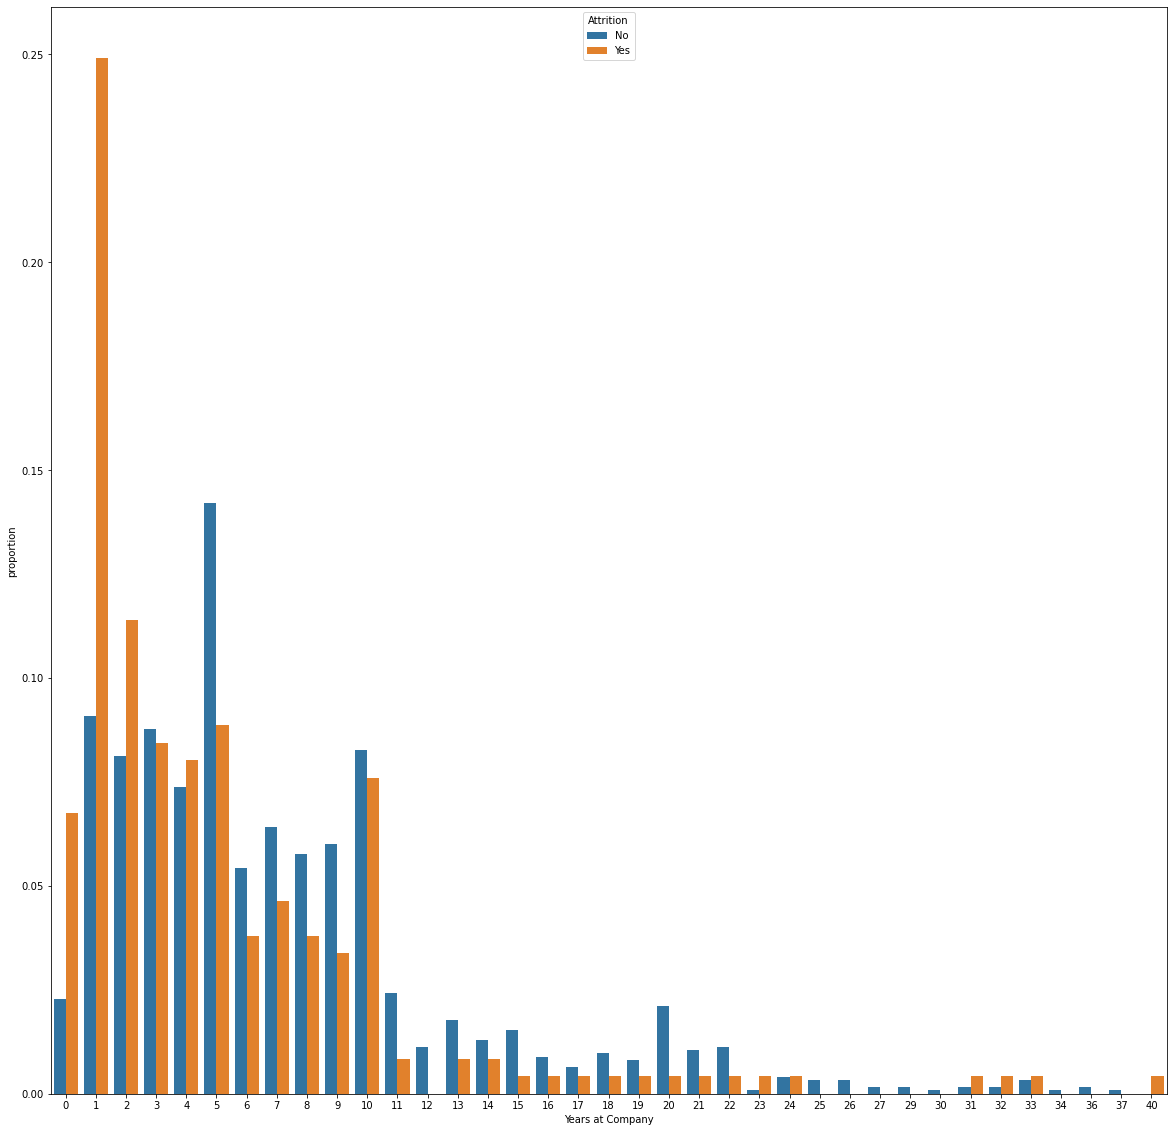

In [15]:
# Years At Company 
x, y, hue = "Years at Company", "proportion", "Attrition"
hue_order = [0, 1]
plt.figure(figsize=(20,20))

(attrition_df[x]
 .groupby(attrition_df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

plt.savefig('images/YrsAtCompany_barplot.png')

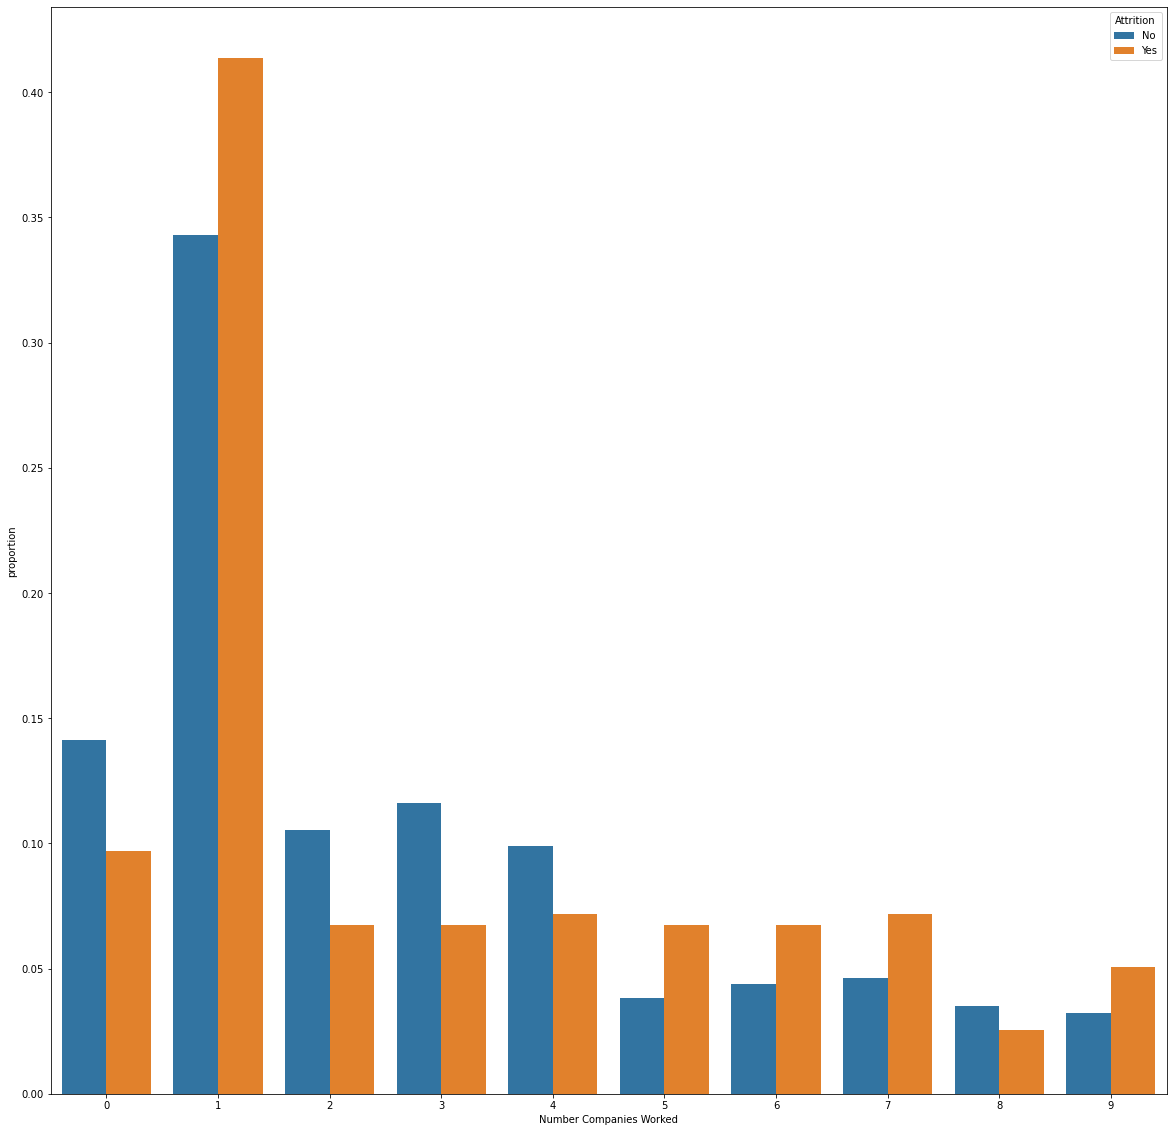

In [17]:
# Num of comapnies worked at
x, y, hue = "Number Companies Worked", "proportion", "Attrition"
hue_order = [0, 1]
plt.figure(figsize=(20,20))

(attrition_df[x]
 .groupby(attrition_df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

plt.savefig('images/NumCompaniesWorked_barplot.png')

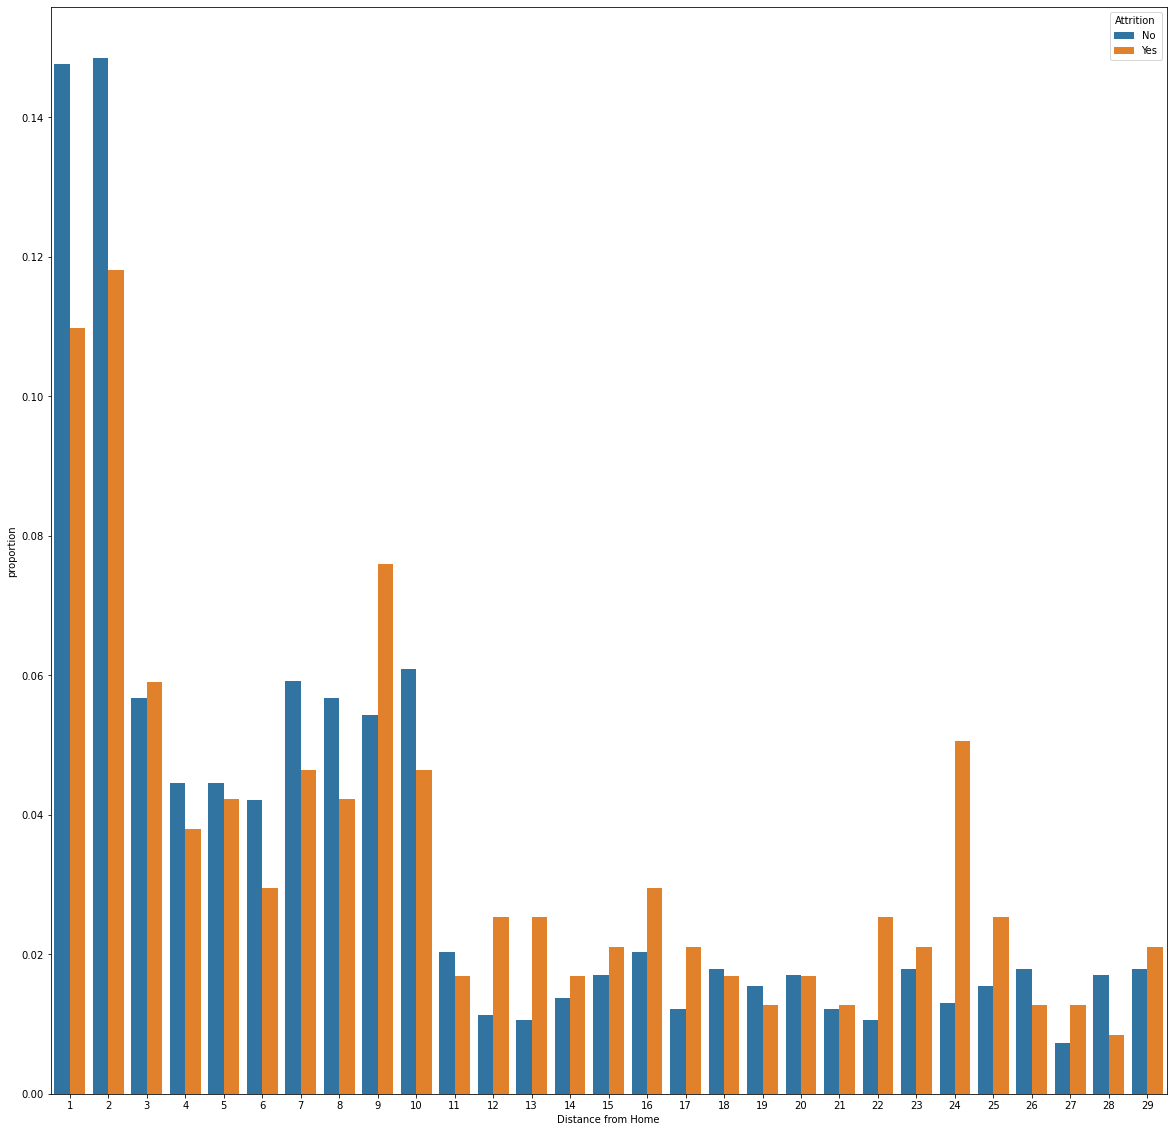

In [18]:
# Distance from Home 
x, y, hue = "Distance from Home", "proportion", "Attrition"
hue_order = [0, 1]
plt.figure(figsize=(20,20))

(attrition_df[x]
 .groupby(attrition_df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

plt.savefig('images/distance_barplot.png')

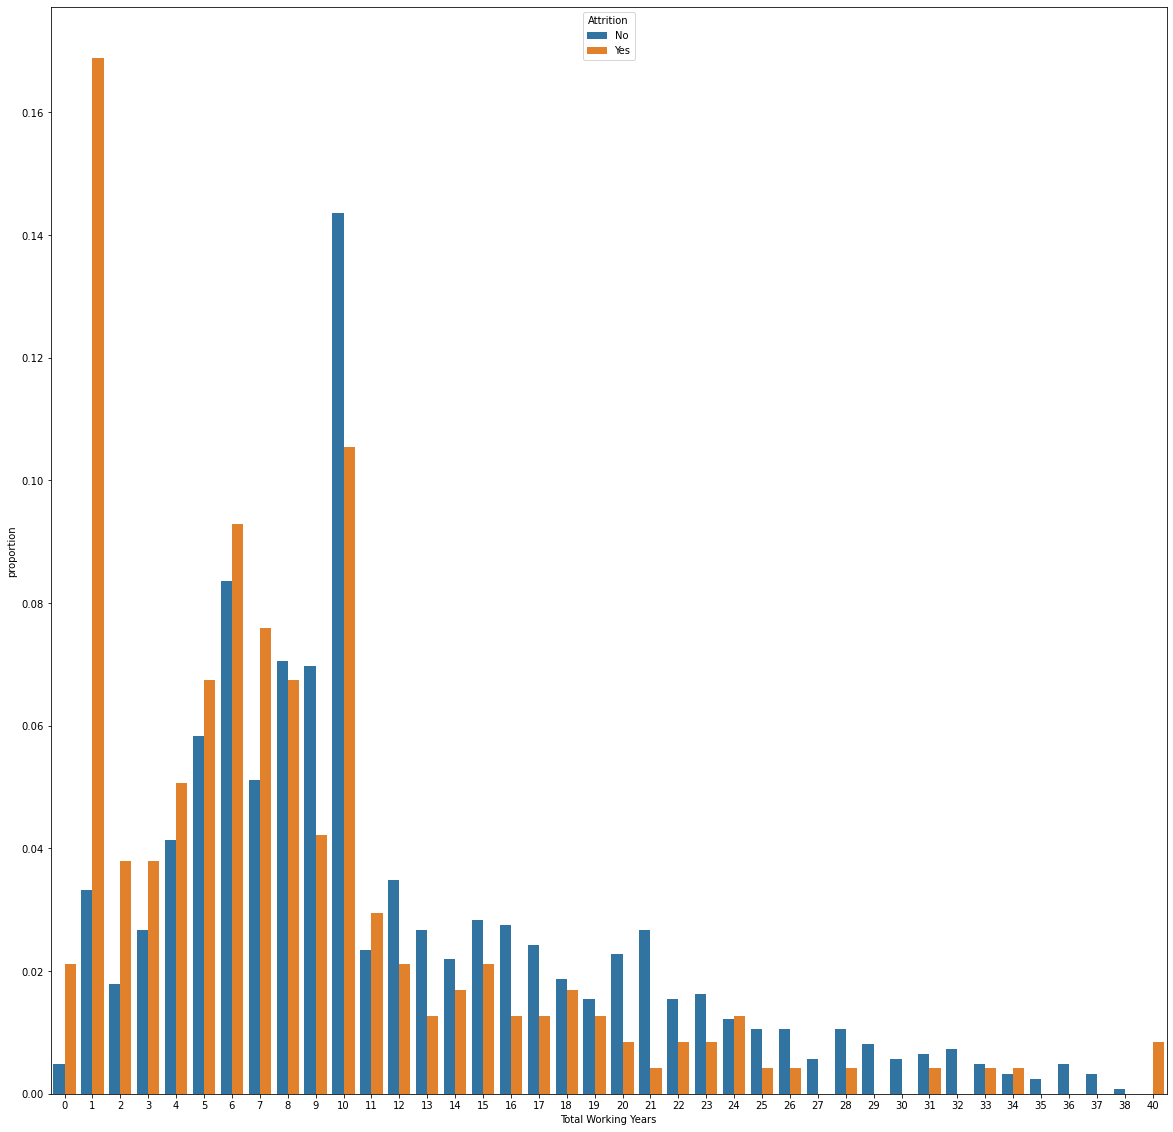

In [19]:
# Tot. Working Years 
x, y, hue = "Total Working Years", "proportion", "Attrition"
hue_order = [0, 1]
plt.figure(figsize=(20,20))

(attrition_df[x]
 .groupby(attrition_df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

plt.savefig('images/totWork_years_barplot.png')

<AxesSubplot:xlabel='Overtime', ylabel='proportion'>

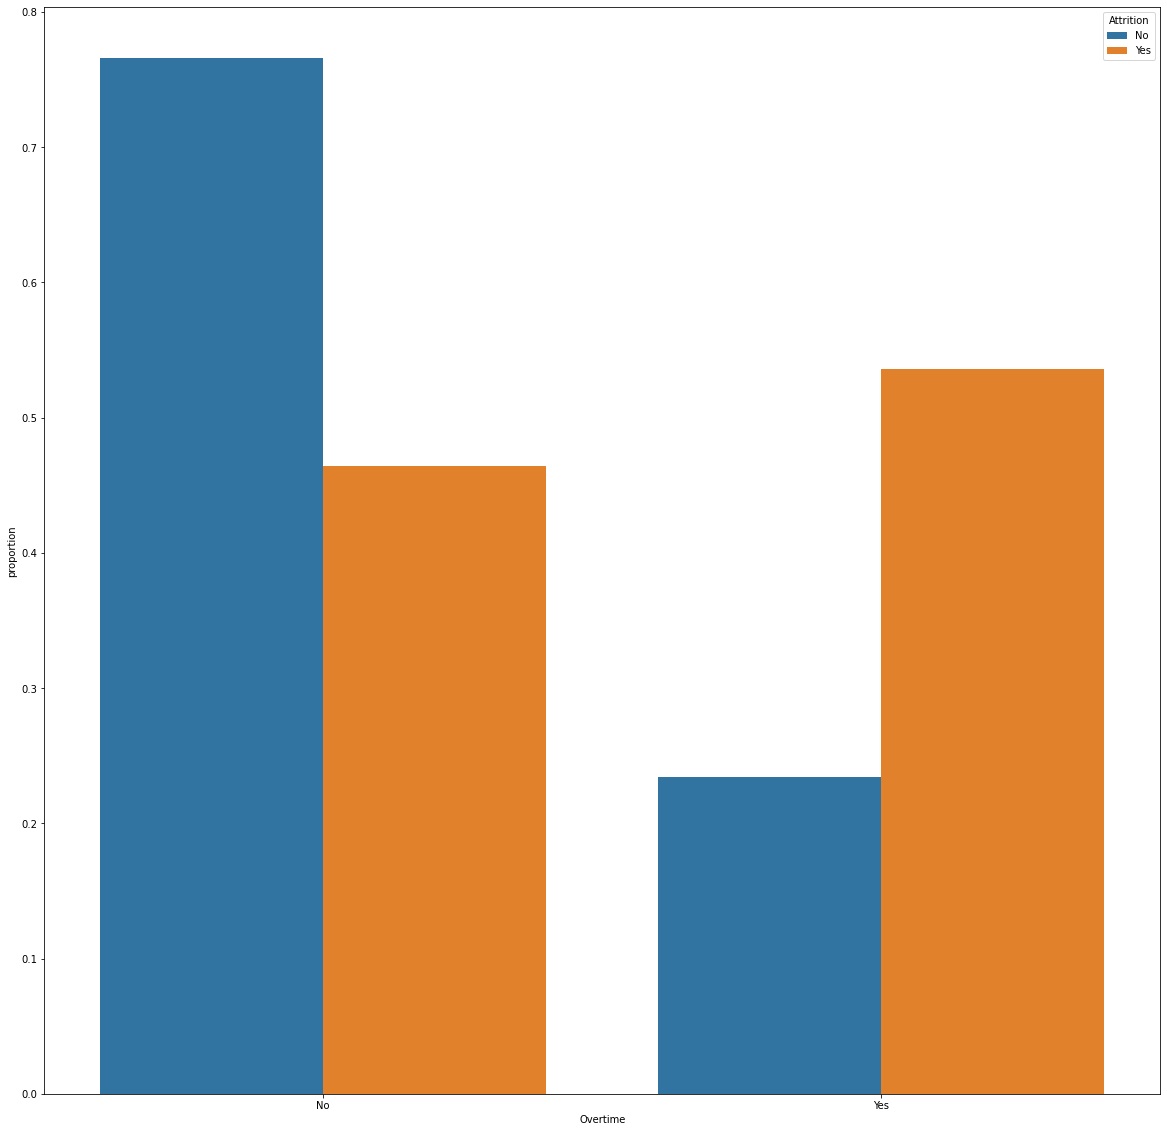

In [20]:
# Tot. Working Years 
x, y, hue = "Overtime", "proportion", "Attrition"
hue_order = [0, 1]
plt.figure(figsize=(20,20))

(attrition_df[x]
 .groupby(attrition_df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))